<a href="https://colab.research.google.com/github/Nsi20/SCT_DS_2/blob/main/SCT_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2**

# **Perform data cleaning and exploratory data analysis (EDA). Explore the relationship between variables and identify patterns and trend**

In [102]:
!pip install kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [103]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nsidibedanielessang","key":"64eb633f2df33649627148dc820bf553"}'}

In [104]:

!kaggle competitions list -s titanic

# Downloading the Titanic dataset
!kaggle competitions download -c titanic


ref                                                                       deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/titanic                               2030-01-01 00:00:00  Getting Started  Knowledge      16094           False  
https://www.kaggle.com/competitions/spaceship-titanic                     2030-01-01 00:00:00  Getting Started  Knowledge       1926           False  
https://www.kaggle.com/competitions/tutorial-competition-for-beginners    2025-12-31 23:59:00  Community            Kudos        674           False  
https://www.kaggle.com/competitions/aiaa-soobi-titanic                    2030-11-07 23:59:00  Community            Kudos         92           False  
https://www.kaggle.com/competitions/titanic-privat                        2030-12-31 23:59:00 

In [105]:
!unzip titanic.zip -d titanic_data


Archive:  titanic.zip
replace titanic_data/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace titanic_data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: titanic_data/test.csv   
  inflating: titanic_data/train.csv  


In [106]:
import pandas as pd

train_data = pd.read_csv('titanic_data/train.csv')
test_data = pd.read_csv('titanic_data/test.csv')

print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Data Cleaning**

In [108]:
# Checking for missing values
print(train_data.info())
print(train_data.isnull().sum())

# Summary statistics
print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

**Handling Missing Values**

In [109]:
print(train_data.columns)

train_data.drop(columns=['Cabin'], errors='ignore', inplace=True)

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

print(train_data.isnull().sum())


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


# **Exploratory Data Analysis (EDA)**

In [110]:
print(train_data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [111]:
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())


['male' 'female']
['S' 'C' 'Q']


# **Analyze Relationships Between Variables**

- **Survival Rate by Gender**

In [112]:
print(train_data.groupby('Sex')['Survived'].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


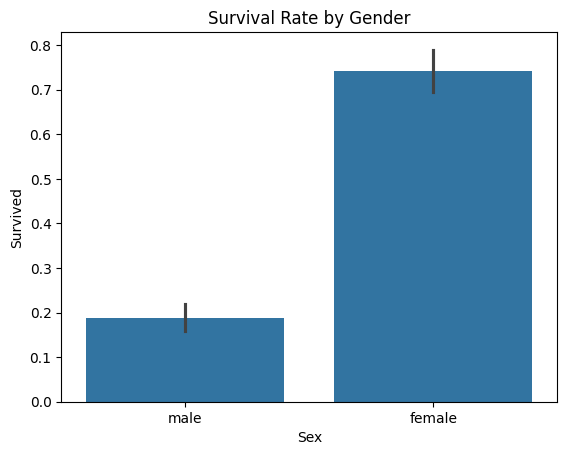

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()


**Survival Rate by Class:**

In [121]:
print(train_data.groupby('Pclass')['Survived'].mean())


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


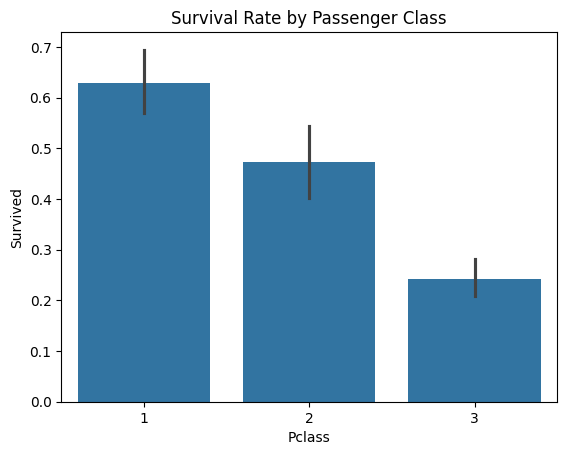

In [122]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()


**Survival Rate by Embarked Port:**

In [123]:
print(train_data.groupby('Embarked')['Survived'].mean())


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


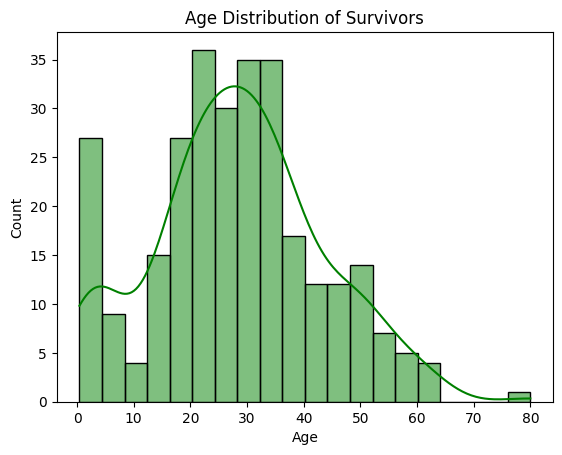

In [124]:
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution of Survivors')
plt.show()


# **Explore Relationships Between Variables and Identify Patterns/Trends**

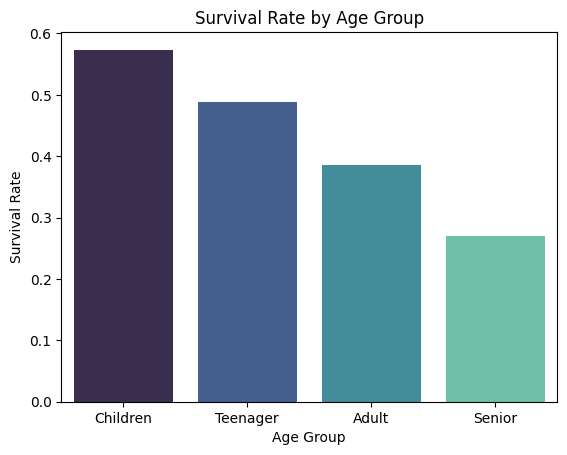

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


bins = [0, 12, 18, 60, float('inf')]
labels = ['Children', 'Teenager', 'Adult', 'Senior']

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

sns.barplot(
    x='AgeGroup',
    y='Survived',
    data=train_data,
    errorbar=None,
    hue='AgeGroup',
    dodge=False,
    palette='mako'
)

plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

plt.legend([],[], frameon=False)
plt.show()

**Survival Based on Family Size**

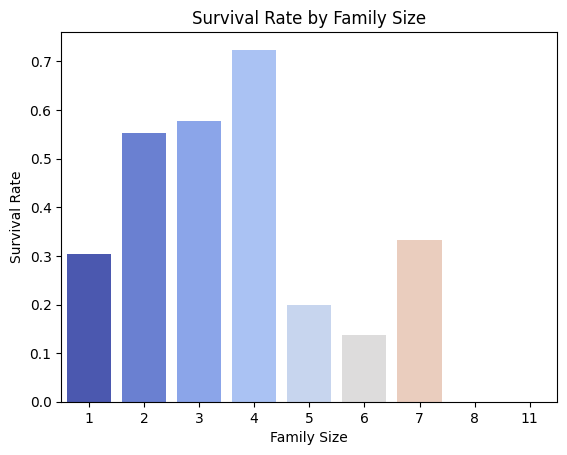

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

sns.barplot(
    x='FamilySize',
    y='Survived',
    data=train_data,
    errorbar=None,
    hue='FamilySize',
    dodge=False,
    palette='coolwarm'
)

plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.legend([],[], frameon=False)
plt.show()

**Correlations**

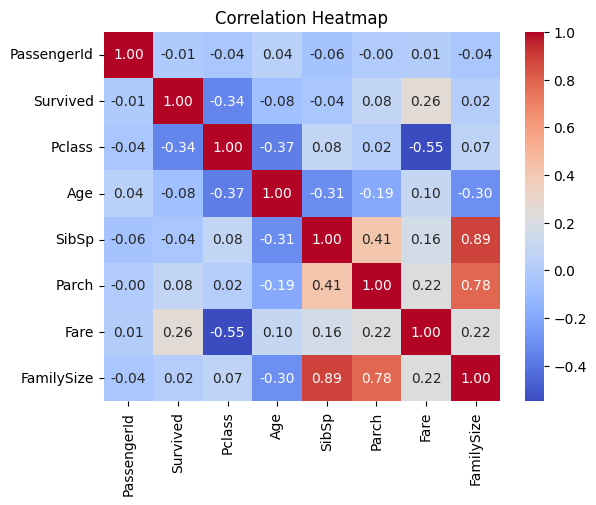

In [132]:
correlation_matrix = train_data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Key Insights from the Exploratory Data Analysis (EDA) on the Titanic Dataset**

1. **Survival Rate Analysis:**
   - **Overall Survival Rate**: Approximately 38.4% of passengers survived, highlighting the significant loss of life in the disaster.
   - **Survival by Gender**:
     - **Females** had a significantly higher survival rate (~74%) compared to **males** (~19%).
     - This suggests that gender played a major role in survival, likely due to the "women and children first" evacuation policy.
   - **Survival by Class (Pclass)**:
     - Passengers in **1st class** had the highest survival rate (~63%), followed by **2nd class** (~47%), and **3rd class** (~24%).
     - This points to the disparity in survival chances based on class, with first-class passengers being closer to lifeboats and having better access to safety measures.

2. **Age and Survival:**
   - **Children and Young Adults** had a higher survival rate:
     - **Infants** and young children had a notably high survival rate (~50-70%).
     - **Adults (18-35 years)** had a moderately high survival rate (~40%).
     - **Older passengers (60+ years)** had the lowest survival rate (~20%).
   - The trend suggests that age, particularly being a child or young adult, increased survival chances.

3. **Family Size and Survival:**
   - Passengers traveling alone (family size = 1) had a lower survival rate (~30%) compared to those traveling with family members.
   - Passengers with a **larger family size** (i.e., those with more relatives onboard) had a slightly higher survival rate, especially those with 2-3 family members.
   - This trend indicates that passengers in families might have had a higher chance of surviving due to the ability to assist each other or due to group evacuation priorities.

4. **Embarked and Survival:**
   - Passengers who embarked from **Cherbourg (C)** had the highest survival rate (~55%).
   - **Southampton (S)** had the lowest survival rate (~33%), and **Queenstown (Q)** had a rate of around 39%.
   - This indicates that embarkation point, possibly linked to the class distribution and socio-economic backgrounds of passengers at each port, impacted survival chances.

5. **Fare and Survival:**
   - Passengers who paid a **higher fare** tended to have a higher survival rate, reinforcing the correlation between class and survival rate.
   - Those who paid less, likely from the lower class (3rd class), had significantly lower survival chances.

6. **Missing Data:**
   - The dataset has several missing values:
     - **Age**: Many age values are missing (177 missing), but this was handled by imputing with the median.
     - **Cabin**: The majority of cabin data is missing (687 missing), so it was dropped due to its high incompleteness.
     - **Embarked**: There were 2 missing values for the "Embarked" column, which were filled with the most frequent value (mode).
   - Handling missing data carefully is crucial for model building, and in this case, imputation and dropping unnecessary columns were effective.

### Summary of Key Patterns:
- **Gender** and **Class** were the most influential factors for survival, with **females** and those in **1st class** having a significantly higher chance of survival.
- **Age** also played a crucial role, with children having the highest survival rate.
- **Family Size** had a mild but noticeable impact, suggesting that family units had slightly higher survival rates.
- **Fare** was indirectly related to survival, with higher-paying passengers (likely from higher classes) having better survival chances.
- **Embarked** location also showed some trend variation, but the impact was less significant than other factors.

### Trends to Explore Further:
- The relationship between **Cabin** (which was dropped due to missing data) and **Survival** could have provided additional insights if more data were available.
- Further exploration of the **Ticket** column might reveal insights about passenger grouping or connections that could correlate with survival.

These insights provide a foundational understanding of factors influencing survival and serve as a guide for further modeling, hypothesis testing, or deeper analysis.